In [1]:
# Check CUDA availability
import torch

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Device: {torch.cuda.get_device_name(0)}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
else:
    print("WARNING: CUDA is not available. Training will use CPU.")

PyTorch version: 2.6.0+cu124
CUDA available: True
CUDA version: 12.4
GPU Device: NVIDIA GeForce RTX 4060 Ti
Number of GPUs: 1


c:\Users\furqu\OneDrive - UC Leuven-Limburg\Third year\Projects\Gassy\gass_GASSY\ConvNext\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1/3, Loss: 0.6331, Accuracy: 0.6538, Precision: 0.6541
Epoch 2/3, Loss: 0.4665, Accuracy: 0.7830, Precision: 0.7843
Epoch 3/3, Loss: 0.2869, Accuracy: 0.8855, Precision: 0.8869
Training complete. Model saved as convnextv2_base_trained.pth


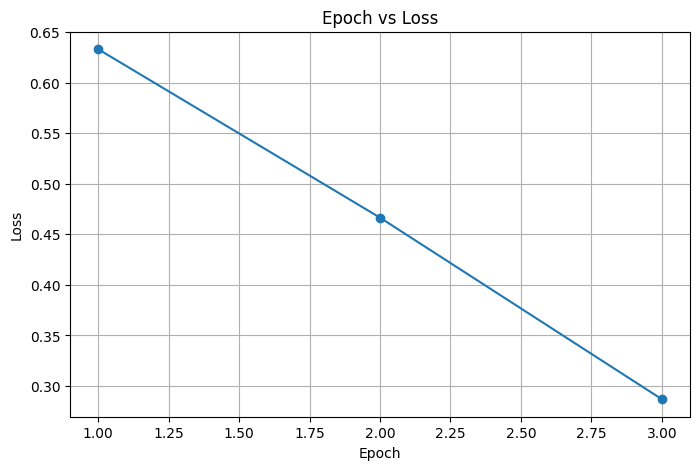

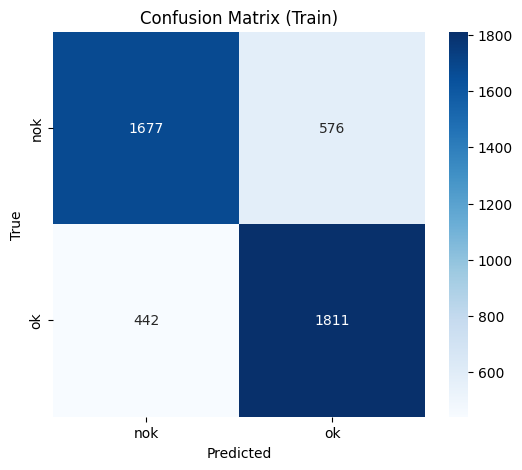

In [2]:
import os
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_dir = 'training-data'

# Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dataset and DataLoader
batch_size = 32
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Model
num_classes = len(train_dataset.classes)
model = timm.create_model('convnextv2_base', pretrained=True, num_classes=num_classes)

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Training loop (with accuracy and precision)
epochs = 3
loss_history = []
all_preds = []
all_labels = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_preds = []
    epoch_labels = []
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        # Collect predictions and labels for metrics
        _, preds = torch.max(outputs, 1)
        epoch_preds.extend(preds.cpu().numpy())
        epoch_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = accuracy_score(epoch_labels, epoch_preds)
    epoch_prec = precision_score(epoch_labels, epoch_preds, average='macro', zero_division=0)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}, Precision: {epoch_prec:.4f}")
    loss_history.append(epoch_loss)
    all_preds.extend(epoch_preds)
    all_labels.extend(epoch_labels)

# Save the trained model
torch.save(model.state_dict(), 'convnextv2_base_trained.pth')
print('Training complete. Model saved as convnextv2_base_trained.pth')

# Plot Epoch vs Loss
epochs_range = range(1, epochs+1)
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss_history, marker='o')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [3]:
import os
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_dir = 'training-data'

# Data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Dataset and DataLoader
batch_size = 32
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Model
num_classes = len(train_dataset.classes)
model = timm.create_model('convnextv2_large', pretrained=True, num_classes=num_classes)

# Training setup
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4)

# Training loop (with accuracy and precision)
epochs = 3
loss_history = []
all_preds = []
all_labels = []
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    epoch_preds = []
    epoch_labels = []
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        # Collect predictions and labels for metrics
        _, preds = torch.max(outputs, 1)
        epoch_preds.extend(preds.cpu().numpy())
        epoch_labels.extend(labels.cpu().numpy())
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = accuracy_score(epoch_labels, epoch_preds)
    epoch_prec = precision_score(epoch_labels, epoch_preds, average='macro', zero_division=0)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}, Precision: {epoch_prec:.4f}")
    loss_history.append(epoch_loss)
    all_preds.extend(epoch_preds)
    all_labels.extend(epoch_labels)

# Save the trained model
torch.save(model.state_dict(), 'convnextv2_large_trained.pth')
print('Training complete. Model saved as convnextv2_large_trained.pth')

# Plot Epoch vs Loss
epochs_range = range(1, epochs+1)
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss_history, marker='o')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.title('Confusion Matrix (Train)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


KeyboardInterrupt: 